The data is about the number of hours any person is absent and this data can used to increase the productivity of any person
in terms of understanding where does the absent time goes and how it can be minimised. 
Here the data is continuous and we are going to use linear regression in further part of the data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
ab=pd.read_csv('Absenteeism.csv')
ab

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,"264,604",...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,"264,604",...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,"271,219",...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,"271,219",...,0,1,2,1,0,2,100,170,35,0


In [3]:
ab.dtypes

ID                                  int64
Reason for absence                  int64
Month of absence                    int64
Day of the week                     int64
Seasons                             int64
Transportation expense              int64
Distance from Residence to Work     int64
Service time                        int64
Age                                 int64
Work load Average/day              object
Hit target                          int64
Disciplinary failure                int64
Education                           int64
Son                                 int64
Social drinker                      int64
Social smoker                       int64
Pet                                 int64
Weight                              int64
Height                              int64
Body mass index                     int64
Absenteeism time in hours           int64
dtype: object

In [4]:
ab.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [5]:
ab.rename(columns={'Work load Average/day ':'Work load Average per day'}, inplace=True)

In [6]:
ab

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,"264,604",...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,"264,604",...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,"271,219",...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,"271,219",...,0,1,2,1,0,2,100,170,35,0


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ab['Work load Average per day']=le.fit_transform(ab['Work load Average per day'])

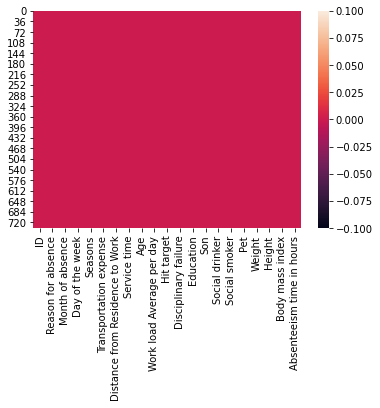

In [8]:
sns.heatmap(ab.isnull())

In [9]:
ab.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,17.762162,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,11.251952,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,8.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,17.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,28.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,37.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [10]:
ab.corr()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.104460,...,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997
Reason for absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.131877,...,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116
Month of absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.079267,...,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.024345
Day of the week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.032231,...,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361
Seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.175753,...,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615
Transportation expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.008913,...,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.077870,...,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.039974,...,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.063758,...,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Work load Average per day,0.104460,-0.131877,-0.079267,0.032231,0.175753,0.008913,-0.077870,-0.039974,-0.063758,1.000000,...,0.032693,-0.073530,0.019852,-0.066010,0.011941,0.032594,-0.052058,0.075569,-0.091256,0.008197


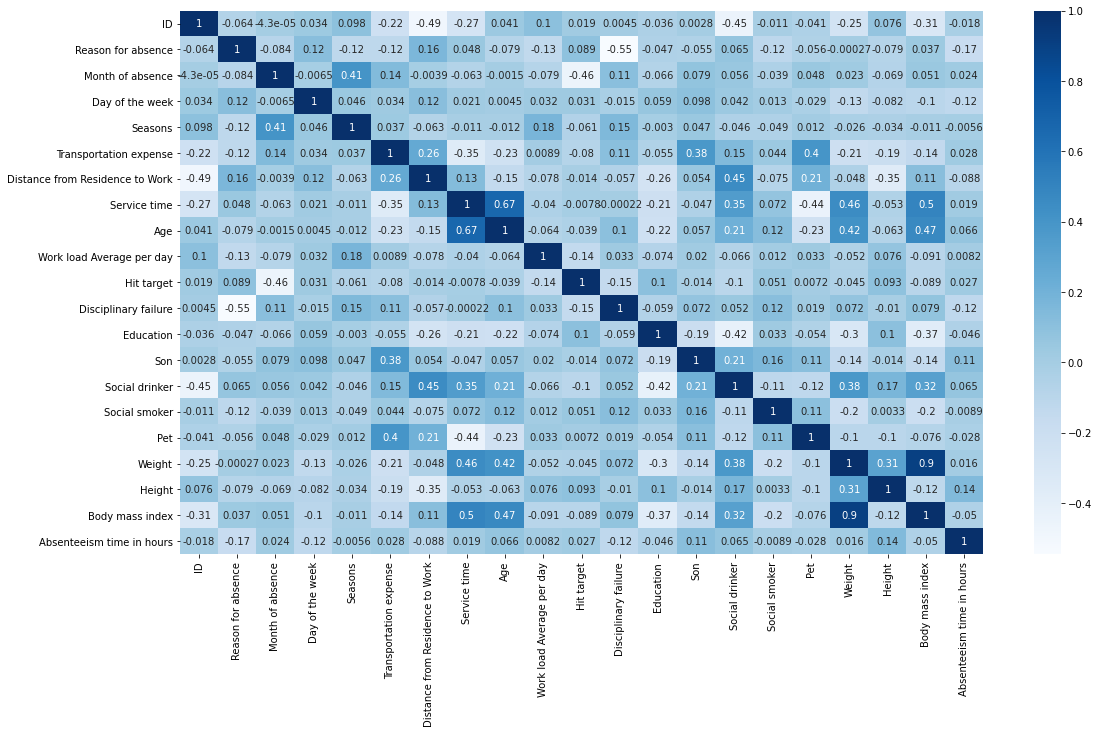

In [11]:
plt.figure(figsize=(18,10))
sns.heatmap(ab.corr(), annot=True, cmap='Blues')

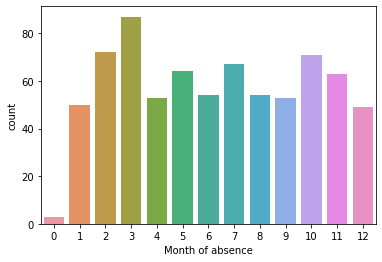

In [12]:
sns.countplot(ab['Month of absence'])

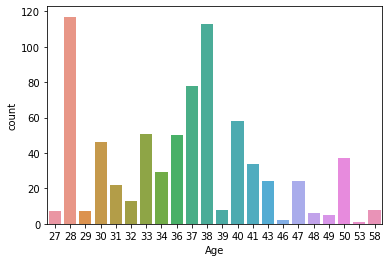

In [13]:
sns.countplot(ab['Age'])

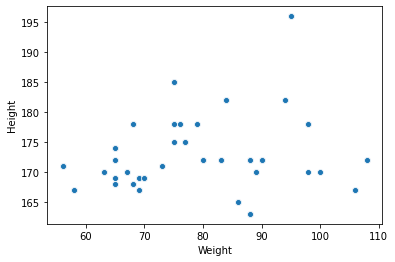

In [14]:
sns.scatterplot(x='Weight', y='Height', data=ab)

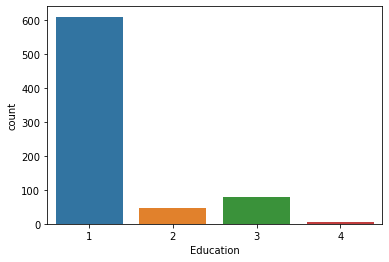

In [15]:
sns.countplot(ab['Education'])

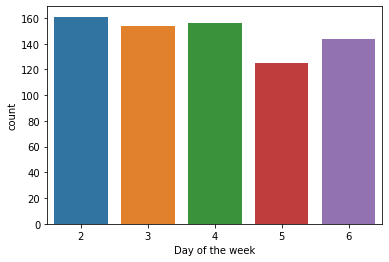

In [16]:
sns.countplot(ab['Day of the week'])

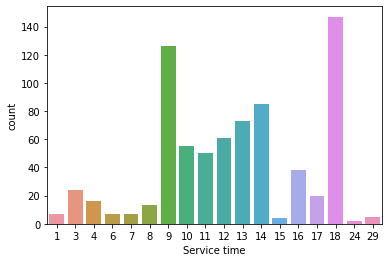

In [17]:
sns.countplot(ab['Service time'])

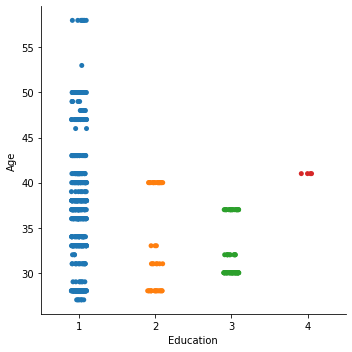

In [18]:
sns.catplot(x='Education', y='Age', data=ab)

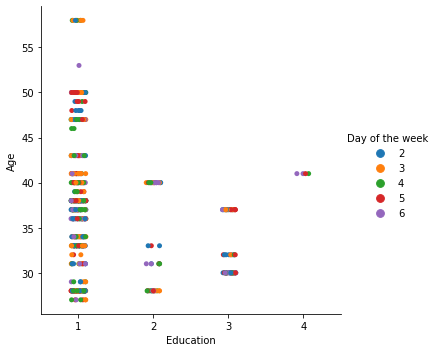

In [19]:
sns.catplot(x='Education', y='Age', hue='Day of the week', data=ab)

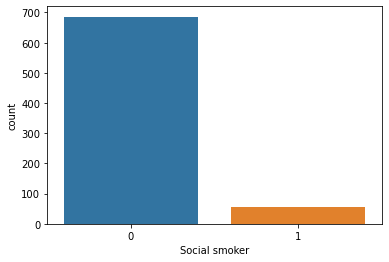

In [20]:
sns.countplot(ab['Social smoker'])

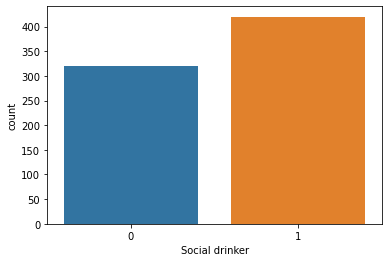

In [21]:
sns.countplot(ab['Social drinker'])

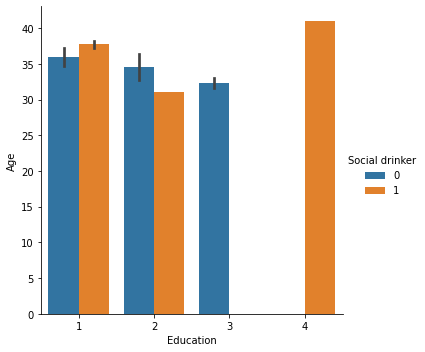

In [22]:
sns.catplot(x='Education', y='Age', hue='Social drinker', data=ab, kind='bar')

In [23]:
ab.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average per day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

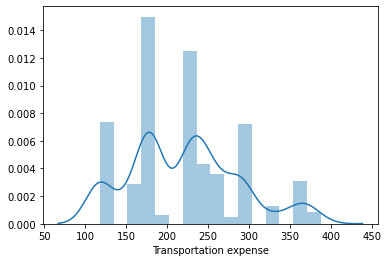

In [24]:
sns.distplot(ab['Transportation expense'])

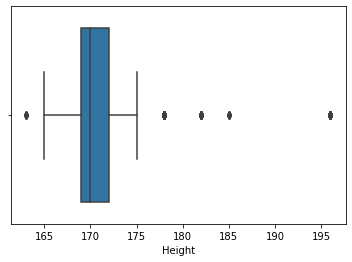

In [25]:
sns.boxplot(ab['Height'])

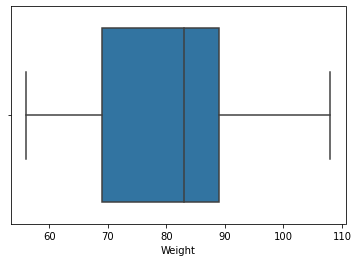

In [26]:
sns.boxplot(ab['Weight'])

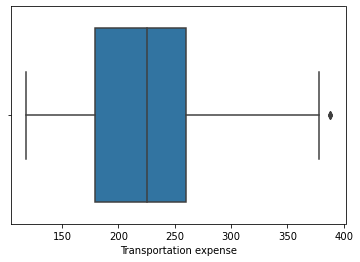

In [27]:
sns.boxplot(ab['Transportation expense'])

{'whiskers': [<matplotlib.lines.Line2D at 0xe08e4c0>,
 'caps': [<matplotlib.lines.Line2D at 0xe08eb80>,
 'boxes': [<matplotlib.lines.Line2D at 0xe08e160>],
 'medians': [<matplotlib.lines.Line2D at 0xe099280>],
 'fliers': [<matplotlib.lines.Line2D at 0xe099580>],
 'means': []}

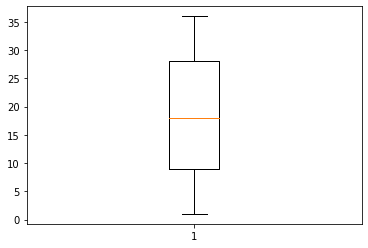

In [28]:
plt.boxplot(ab['ID'])

Now we have removed the outliers and we need to see the skewness of the data 
and if any we need to remove the skewness and improve the model prediction and score

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(ab))
am=ab[(z<3).all(axis=1)]
am

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,6,...,0,1,2,1,0,1,90,172,30,4
2,3,23,7,4,1,179,51,18,38,6,...,0,1,0,1,0,0,89,170,31,2
4,11,23,7,5,1,289,36,13,33,6,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,6,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,6,...,0,1,1,1,0,4,80,172,27,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,28,22,7,4,1,225,26,9,28,18,...,0,1,1,0,0,2,69,169,24,8
735,11,14,7,3,1,289,36,13,33,18,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,18,...,0,3,1,0,0,1,88,172,29,4
738,8,0,0,4,2,231,35,14,39,22,...,0,1,2,1,0,2,100,170,35,0


In [30]:
am.skew()

ID                                -0.058065
Reason for absence                -1.027334
Month of absence                   0.109690
Day of the week                    0.082048
Seasons                           -0.019301
Transportation expense             0.327717
Distance from Residence to Work    0.199294
Service time                      -0.153111
Age                                0.517042
Work load Average per day          0.133439
Hit target                        -0.461369
Disciplinary failure               0.000000
Education                          1.990046
Son                                1.447470
Social drinker                    -0.188822
Social smoker                      0.000000
Pet                                1.721238
Weight                            -0.128296
Height                             1.449688
Body mass index                    0.037118
Absenteeism time in hours          3.171312
dtype: float64

(array([483.,   0.,   0.,   0.,   0.,  16.,   0.,   0.,   0.,  77.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

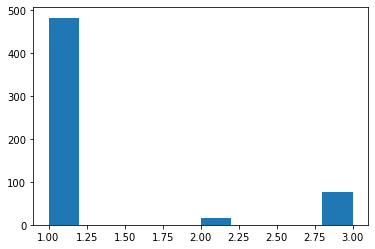

In [31]:
plt.hist(am['Education'])

(array([269.,   0., 190.,   0.,   0.,  68.,   0.,  12.,   0.,  37.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

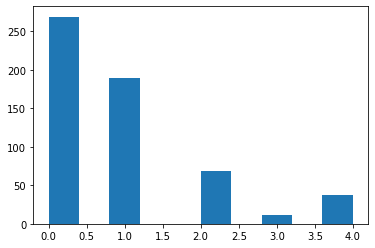

In [32]:
plt.hist(am['Son'])

In [33]:
at=am.copy()

In [34]:
at['Education']=np.sqrt(at['Education'])
at['Son']=np.log1p(at['Son'])
at['Pet']=np.log1p(at['Pet'])
at['Height']=np.sqrt(at['Height'])
at['Absenteeism time in hours']=np.log1p(at['Absenteeism time in hours'])
at['Reason for absence']=(at['Reason for absence']/20)**10

Now after akewing we need to use the linear regression algorithm to make the model as the values in target column are continuous

In [35]:
X=at.iloc[:,0:-1]
y=at.iloc[:,-1]

In [36]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
X=sd.fit_transform(X)
X

array([[-0.63135694,  0.40501465,  0.20742767, ...,  0.92877005,
         0.37848306,  0.74242082],
       [-1.33003436, -0.50164893,  0.20742767, ...,  0.84736842,
        -0.25376988,  0.9827999 ],
       [-0.63135694, -0.50164893,  0.20742767, ...,  0.92877005,
         0.37848306,  0.74242082],
       ...,
       [-1.50470371, -0.87798914,  0.20742767, ...,  0.76596678,
         0.37848306,  0.50204173],
       [-0.89336097, -0.87822492, -1.78387794, ...,  1.74278641,
        -0.25376988,  1.94431623],
       [ 1.46467532, -0.87822492, -1.78387794, ..., -0.12945121,
         1.32000975, -0.4594746 ]])

In [37]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
X=pca.fit_transform(X)


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
max_scr=0
for rstate in range(1,46):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=rstate, test_size=0.20)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred_y=lr.predict(X_test)
    r2_scr=r2_score(y_test,pred_y)
    if r2_scr>max_scr:
        max_scr=r2_scr
        final_rstate=rstate
        
print('The corresponding value for the rstate', rstate,'to max r2 scr is',max_scr)

The corresponding value for the rstate 45 to max r2 scr is 0.31322520963144374


In [39]:
from sklearn.model_selection import cross_val_score
crs_val_scr=cross_val_score(lr,X,y,scoring='r2', cv=10).mean()
crs_val_scr

0.12753843801037262

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
param_grid={'n_estimators':[100,200,300,500,1000], 'learning_rate':[1,0.1,0.01,0.001,0.0001]}
gs=GridSearchCV(gbr, param_grid=param_grid, cv=10)
gs.fit(X,y)
gs.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [41]:
crs_val_scr=cross_val_score(gbr,X,y,scoring='r2', cv=10).mean()
crs_val_scr

0.020173024251342642

In [42]:
gbr=GradientBoostingRegressor(learning_rate=0.01, n_estimators=200)
gbr.fit(X_train,y_train)
pred_y=gbr.predict(X_test)
r2_scr=r2_score(y_test,pred_y)
print('r2 score',r2_scr)

r2 score 0.0959866728476314


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
alpha_value={'alpha':[1,0.1,0.01,0.001]}
model=Ridge(),Lasso()
for m in model:
    grid=GridSearchCV(estimator=m, param_grid=alpha_value, cv=5)
    grid.fit(X,y)
    print(grid.best_params_)
    print(grid.best_score_)

{'alpha': 1}
0.1412298847203714
{'alpha': 0.001}
0.1410335526301491


In [46]:
ls=Lasso(alpha=0.001)
ls.fit(X,y)
pred_y=ls.predict(X_test)
r2_scr=r2_score(y_test,pred_y)
print('r2 score',r2_scr)
print('mean squared error', mean_squared_error(y_test,pred_y))

r2 score 0.18485141399221072
mean squared error 0.4028241836454143


In [47]:
rg=Ridge(alpha=1)
rg.fit(X,y)
pred_y=rg.predict(X_test)
r2_scr=r2_score(y_test,pred_y)
print('r2 score',r2_scr)
print('mean squared error', mean_squared_error(y_test,pred_y))

r2 score 0.18488208915195226
mean squared error 0.40280902481867625


In [48]:
df1=pd.DataFrame(pred_y)
df1.to_csv('lr_prediction.csv')

In [49]:
import joblib
joblib.dump(lr,'lr_Absenteeism.pkl')

['lr_Absenteeism.pkl']